# CNN CIFAR-10 Dropout

$$\begin{array}{cc}
\mbox{filter_size}&\mbox{Test Accuracy}\\\hline
3&0.7314001\\
4&0.7160001\\
5&0.70909995\\
6&0.6827\\
7&0.69159997\\
\end{array}$$

$$\begin{array}{ccccc}
\mbox{filter_size}&\mbox{CNN}&\mbox{D}&\mbox{BN}&\mbox{D+BN}\\\hline
3&0.69790006&0.7314001&0.6773&0.7068\\
4&0.6929999&0.7160001&0.69890004&0.7045\\
5&0.68859994&0.70909995&0.66130006&0.7068\\
6&0.65369993&0.6827&0.682&0.7059\\
7&0.64879996&0.69159997&0.67899996&0.65610003\\
\end{array}$$

Ng
[youtube](https://www.youtube.com/watch?v=D8PJAL-MZv8&index=6&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)
[youtube](https://www.youtube.com/watch?v=ARq74QuavAo&index=7&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)

In [13]:
import numpy as np
import tensorflow as tf

tf.random.set_random_seed(337)

keep_prob = 0.8
x = tf.random.normal((20,1))
boolean_masking = tf.cast(tf.random.uniform((20,1)) < keep_prob, tf.float32)
drop = tf.multiply(x, boolean_masking) 
drop /= keep_prob

drop2 = tf.nn.dropout(x, keep_prob=keep_prob) 

with tf.Session() as sess:
    x_now, boolean_masking, drop_now = sess.run([x, boolean_masking, drop])
    
    data = np.hstack([x_now, boolean_masking, drop_now])
    for x_now, boolean_masking, drop_now in data:
        print(x_now, boolean_masking, drop_now)  
    print()
    
    x_now, drop_now = sess.run([x, drop2])
    
    data = np.hstack([x_now, drop_now])
    for x_now, drop_now in data:
        print(x_now, drop_now, x_now/keep_prob)  
    print()    

-0.49862936 0.0 -0.0
-1.0852985 1.0 -1.3566232
0.28686237 1.0 0.35857797
-0.28725797 0.0 -0.0
2.5917623 0.0 0.0
1.7300563 1.0 2.1625705
2.2715602 1.0 2.8394504
0.16134317 1.0 0.20167896
0.18903644 1.0 0.23629555
0.97835433 1.0 1.222943
1.6780373 1.0 2.0975466
0.4788077 0.0 0.0
1.6049076 1.0 2.0061345
-0.5249672 1.0 -0.656209
1.8363839 0.0 0.0
-0.34664485 1.0 -0.43330607
-0.41237843 1.0 -0.515473
-0.9324004 1.0 -1.1655005
-0.092901275 0.0 -0.0
-0.4018161 1.0 -0.5022701

-1.5155877 -1.8944846 -1.8944846093654633
2.0784354 2.5980444 2.598044276237488
2.0336666 2.5420833 2.542083263397217
0.2669677 0.33370966 0.33370964229106903
-0.8221392 -0.0 -1.0276740044355392
-0.20668334 -0.2583542 -0.25835417211055756
1.5713216 1.964152 1.9641520082950592
0.8851406 1.1064258 1.1064257472753525
0.7791431 0.0 0.9739288687705994
0.66634744 0.8329343 0.8329343050718307
1.3617053 1.7021316 1.7021316289901733
-0.6987452 -0.8734315 -0.8734314888715744
0.39765117 0.49706396 0.4970639571547508
-0.57123965 -0.

# filter_size = 3 

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
epoch_number    : 0
cost_this_epoch : 772.1867175102234

epoch_number    : 1
cost_this_epoch : 558.4417606592178

epoch_number    : 2
cost_this_epoch : 478.6096351146698

epoch_number    : 3
cost_this_epoch : 426.79664051532745

epoch_number    : 4
cost_this_epoch : 380.55226492881775

epoch_number    : 5
cost_this_epoch : 338.98434886336327

epoch_number    : 6
cost_this_epoch : 299.3770461976528

epoch_number    : 7
cost_this_epoch : 261.49317666888237

epoch_number    : 8
cost_this_epoch : 229.60947573184967


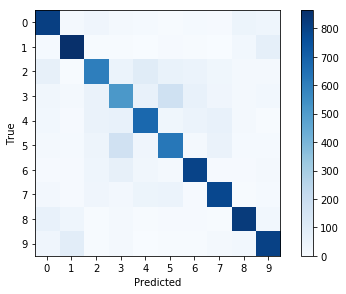

<Figure size 432x288 with 0 Axes>

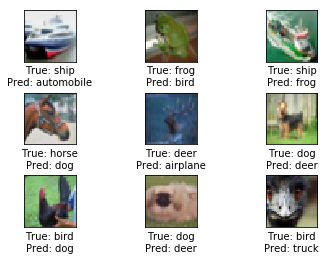

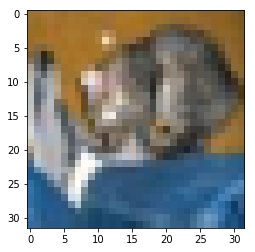

<Figure size 432x288 with 0 Axes>

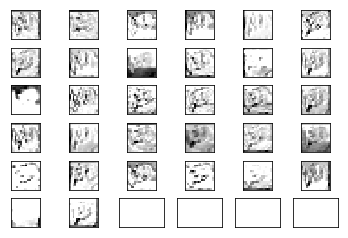

<Figure size 432x288 with 0 Axes>

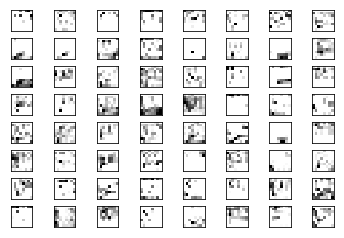

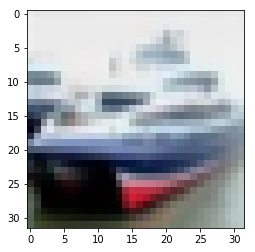

<Figure size 432x288 with 0 Axes>

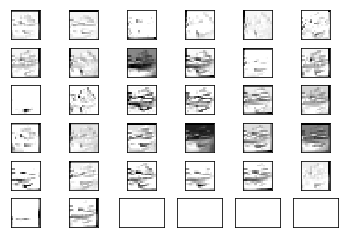

<Figure size 432x288 with 0 Axes>

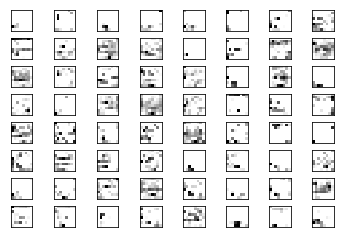

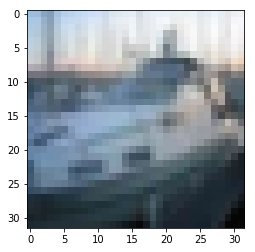

<Figure size 432x288 with 0 Axes>

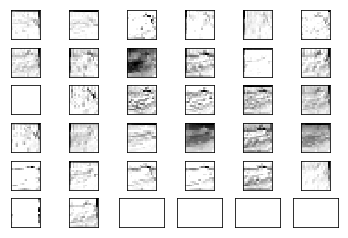

<Figure size 432x288 with 0 Axes>

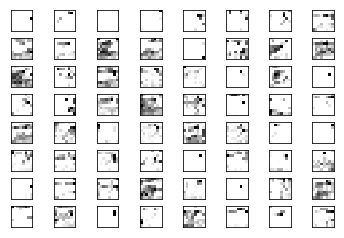

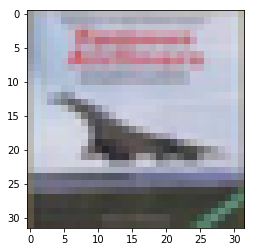

<Figure size 432x288 with 0 Axes>

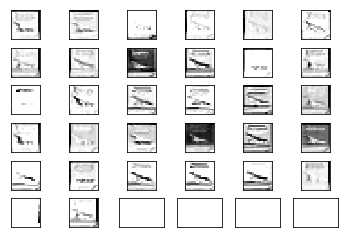

<Figure size 432x288 with 0 Axes>

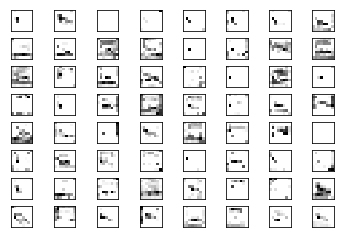

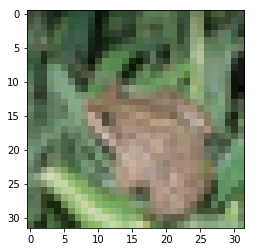

<Figure size 432x288 with 0 Axes>

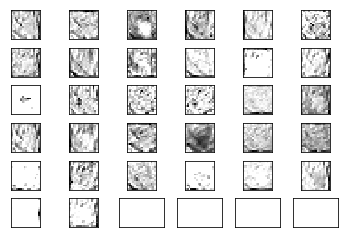

<Figure size 432x288 with 0 Axes>

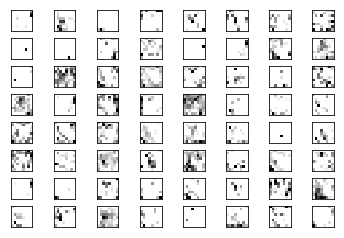

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix

# download these four fro https://github.com/Hvass-Labs/TensorFlow-Tutorials
# we use these to download CIFAR10 dataset
import cache    # module from Hvass Labs
import dataset  # module from Hvass Labs
import download # module from Hvass Labs
import cifar10  # module from Hvass Labs

import utils

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size_train = 50000
data_size_test = 10000
batch_size = 100
lr = 1e-3
epoch = 15


""" Data Loading """
def load_cifar10():
    # make directory if not exist
    if not os.path.isdir("data"):
        os.mkdir("data")
    if not os.path.isdir("data/CIFAR-10"):
        os.mkdir("data/CIFAR-10")

    # download and extract if not done yet
    # data is downloaded 
    # from data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    # to data_path  = "data/CIFAR-10/"
    cifar10.data_path = "data/CIFAR-10/"
    cifar10.maybe_download_and_extract()

    # load data
    x_train, y_train_cls, y_train = cifar10.load_training_data()
    x_test, y_test_cls, y_test = cifar10.load_test_data()
    class_names = cifar10.load_class_names()

    x_train = x_train.astype(np.float32)
    y_train_cls = y_train_cls.astype(np.int32)
    y_train = y_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    y_test_cls = y_test_cls.astype(np.int32)
    y_test = y_test.astype(np.float32)

    data = (x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names)

    return data

# x_train.shape     :  (50000, 32, 32, 3)
# x_test.shape      :  (10000, 32, 32, 3)
# y_train.shape     :  (50000, 10)
# y_test.shape      :  (10000, 10)
# y_train_cls.shape :  (50000,)
# y_test_cls.shape  :  (10000,)
data = load_cifar10()
x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names = data


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='y')
y_cls = tf.placeholder(tf.int32, shape=(None,), name='y_cls')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')

# weights and layers #################################################################

# convolution layer 1
# input and input.shape:   x,     (None, 32, 32, 3)
# output and output.shape: conv1, (None, 16, 16, 32)
conv1_W = tf.get_variable("conv1_W", \
                          shape=(3,3,3,32), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv1 = tf.nn.conv2d(x, conv1_W, strides=(1,1,1,1), padding='SAME') # (None, 32, 32, 32)
conv1 = tf.nn.relu(conv1) # (None, 32, 32, 32)
conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 16, 16, 32)

# convolution layer 2
# input and input.shape:   conv1, (None, 16, 16, 32)
# output and output.shape: conv2, (None, 8, 8, 64)
conv2_W = tf.get_variable("conv2_W", \
                          shape=(3,3,32,64), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=(1,1,1,1), \
                     padding='SAME') # (None, 16, 16, 64)
conv2 = tf.nn.relu(conv2) # (None, 16, 16, 64)
conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 8, 8, 64)

# fully connected layer
# input and input.shape:   conv2, (None, 8, 8, 64)
# output and output.shape: fc,    (None, 256) 
flatten = tf.reshape(conv2, (-1, 4096)) # (None, 4096) 
fc_W = tf.get_variable("fc_W", \
                        shape=(4096,256), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
fc = tf.matmul(flatten, fc_W) # (None, 256) 
fc = tf.nn.relu(fc) # (None, 256)
fc = tf.nn.dropout(fc, keep_prob=keep_prob) # (None, 256)

# output layer
# input and input.shape:   fc,     (None, 256) 
# output and output.shape: logits, (None, 10) 
out_W = tf.get_variable("out_W", \
                        shape=(256, 10), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
logits = fc @ out_W # (None, 10) 

# weights and layers #################################################################

# y_pred, and y_pred_cls 
y_pred = tf.nn.softmax(logits, name='y_pred') # probabilities
y_pred_cls = tf.argmax(logits, axis=1, output_type=tf.int32)

# cross_entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y)
cost = tf.reduce_mean(cross_entropy)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# test accuracy
# you have to put test sets to compute test_accuracy
correct_bool = tf.equal(y_cls, y_pred_cls)
test_accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))


""" Train and Test """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    
    # run gradient descent
    for i in range(epoch):
        if 1:
            # perform random permutaion
            idx = np.random.permutation(np.arange(data_size_train)) 
            x_batch = x_train[idx]
            y_batch = y_train[idx]
        else:
            # don't perform random permutaion
            x_batch = x_train
            y_batch = y_train
            
        cost_this_epoch = 0
        for batch_number in range(int(data_size_train/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b, keep_prob: 0.8}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            cost_this_epoch += cost_now
            
        print('epoch_number    :', i)
        print('cost_this_epoch :', cost_this_epoch)
        print()

            
    # compute test accuracy and print confusion matrix 
    x_data = x_test
    y_data = y_test
    y_cls_data = y_test_cls
    y_test_cls_pred = np.zeros(shape=(data_size_test), dtype=np.int32)
    test_accuracy_list = []
    for batch_number in range(int(data_size_test/batch_size)): 
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_b = y_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_cls_b = y_cls_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        test_accuracy_temp, y_test_cls_pred_now = sess.run([test_accuracy,y_pred_cls],
                                                           feed_dict=feed_dict)
        test_accuracy_list.append(test_accuracy_temp)
        y_test_cls_pred[batch_number*batch_size:(batch_number+1)*batch_size] = \
            y_test_cls_pred_now
        
    print('Test Accuracy: ', np.mean(np.array(test_accuracy_list)))
    
    cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('img/cm.png')
    plt.close()
    
    
    # collect info of first 9 test images with false prediction
    images = []
    cls_true = []
    cls_pred = []
    img_shape = (32, 32, 3)
    num_false_prediction = 0
    i = 0
    while num_false_prediction < 9:
        x_b = [x_test[i]]
        y_b = [y_test[i]]
        y_cls_b = [y_test_cls[i]]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        bool_now, y_pred_cls_now = sess.run([correct_bool, y_pred_cls], \
                                            feed_dict=feed_dict)
        if bool_now[0] == False:
            images.append(x_b[0])
            cls_true.append(y_cls_b[0])
            cls_pred.append(y_pred_cls_now[0])
            num_false_prediction += 1
        i += 1
    images = images[0:9]
    cls_true = cls_true[0:9]
    cls_pred = cls_pred[0:9]

        
    # plot 9 test images with false prediction
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    
    plt.figure()
    fig, axes = plt.subplots(sqrt_n, sqrt_n)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i < n:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            if (cls_true is not None) and (cls_pred is not None):
                xlabel = "True: {0}\nPred: {1}".format(class_names[cls_true[i]], \
                                                       class_names[cls_pred[i]])
            elif (cls_true is not None) and (cls_pred is None):
                xlabel = "True: {0}".format(class_names[cls_true[i]])
            elif (cls_true is None) and (cls_pred is not None):
                xlabel = "Pred: {0}".format(class_names[cls_pred[i]])
            else:
                xlabel = ""
            ax.set_xlabel(xlabel)

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
    # plot_test_images_in_input_conv1_conv2_layers(self, num_test_images=2):
    num_test_images = 5
    for i in range(num_test_images):
        image0 = x_test[i]
        utils.plot_one_image(image0, (32, 32, 3), cls_true=None, cls_pred=None)

        feed_dict = {x: [image0]}
        image0_layer1, image0_layer2 = sess.run([conv1, conv2], feed_dict=feed_dict)
        
        # image0_layer1.shape = (1, 16, 16, 32)
        # image0_layer2.shape = (1, 8, 8, 64)
        image0_layer1 = image0_layer1[0]
        image0_layer2 = image0_layer2[0]

        utils.plot_many_images_3d(image0_layer1)
        utils.plot_many_images_3d(image0_layer2)

# filter_size = 4 

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
epoch_number    : 0
cost_this_epoch : 769.1567454338074

epoch_number    : 1
cost_this_epoch : 558.6762863397598

epoch_number    : 2
cost_this_epoch : 479.9111530184746

epoch_number    : 3
cost_this_epoch : 420.6874516606331

epoch_number    : 4
cost_this_epoch : 372.96053916215897

epoch_number    : 5
cost_this_epoch : 329.88298135995865

epoch_number    : 6
cost_this_epoch : 286.96596708893776

epoch_number    : 7
cost_this_epoch : 249.09858313202858

epoch_number    : 8
cost_this_epoch : 213.16705952584743


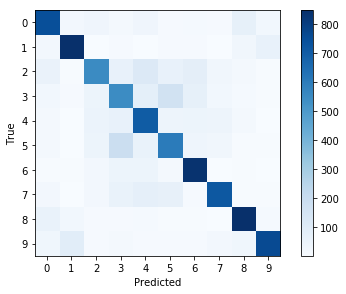

<Figure size 432x288 with 0 Axes>

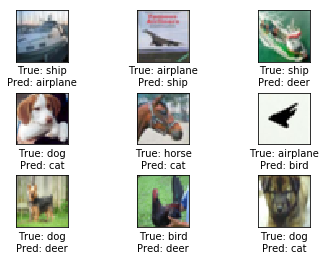

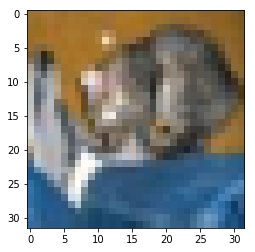

<Figure size 432x288 with 0 Axes>

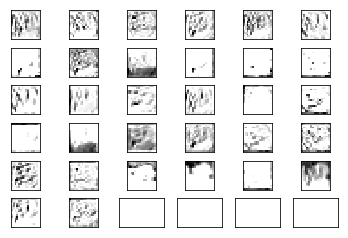

<Figure size 432x288 with 0 Axes>

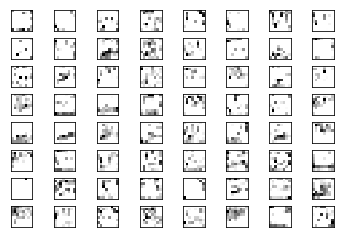

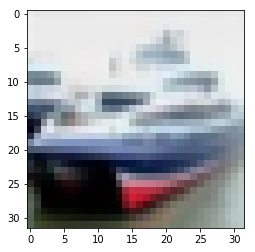

<Figure size 432x288 with 0 Axes>

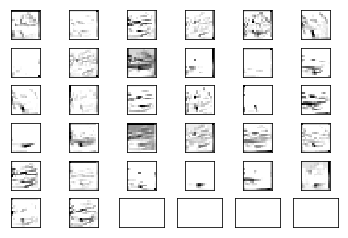

<Figure size 432x288 with 0 Axes>

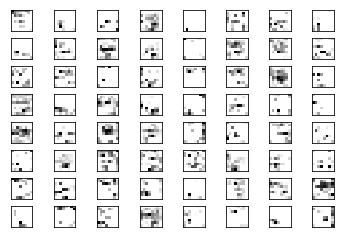

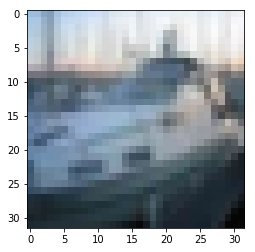

<Figure size 432x288 with 0 Axes>

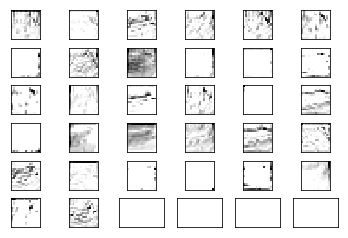

<Figure size 432x288 with 0 Axes>

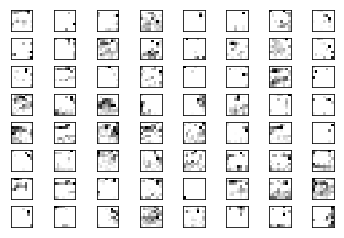

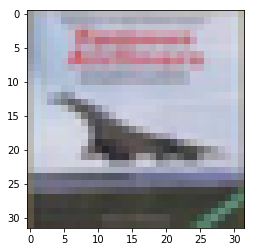

<Figure size 432x288 with 0 Axes>

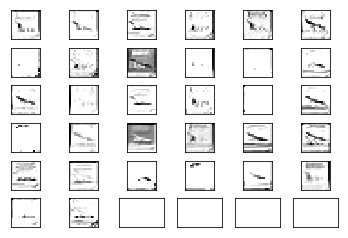

<Figure size 432x288 with 0 Axes>

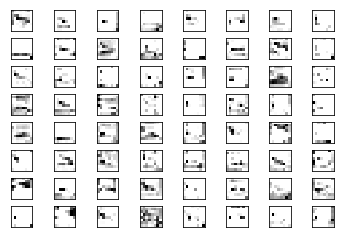

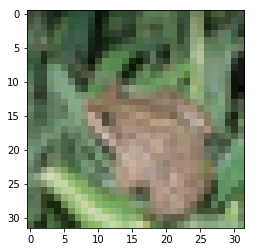

<Figure size 432x288 with 0 Axes>

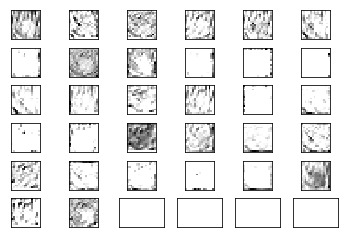

<Figure size 432x288 with 0 Axes>

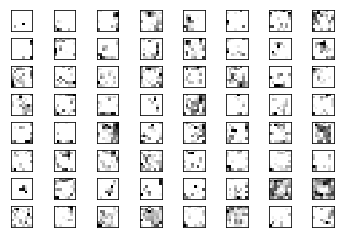

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix

import cache    # module from Hvass Labs
import dataset  # module from Hvass Labs
import download # module from Hvass Labs
import cifar10  # module from Hvass Labs

import utils

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size_train = 50000
data_size_test = 10000
batch_size = 100
lr = 1e-3
epoch = 15


""" Data Loading """
def load_cifar10():
    # make directory if not exist
    if not os.path.isdir("data"):
        os.mkdir("data")
    if not os.path.isdir("data/CIFAR-10"):
        os.mkdir("data/CIFAR-10")

    # download and extract if not done yet
    # data is downloaded 
    # from data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    # to data_path  = "data/CIFAR-10/"
    cifar10.data_path = "data/CIFAR-10/"
    cifar10.maybe_download_and_extract()

    # load data
    x_train, y_train_cls, y_train = cifar10.load_training_data()
    x_test, y_test_cls, y_test = cifar10.load_test_data()
    class_names = cifar10.load_class_names()

    x_train = x_train.astype(np.float32)
    y_train_cls = y_train_cls.astype(np.int32)
    y_train = y_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    y_test_cls = y_test_cls.astype(np.int32)
    y_test = y_test.astype(np.float32)

    data = (x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names)

    return data

# x_train.shape     :  (50000, 32, 32, 3)
# x_test.shape      :  (10000, 32, 32, 3)
# y_train.shape     :  (50000, 10)
# y_test.shape      :  (10000, 10)
# y_train_cls.shape :  (50000,)
# y_test_cls.shape  :  (10000,)
data = load_cifar10()
x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names = data


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='y')
y_cls = tf.placeholder(tf.int32, shape=(None,), name='y_cls')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')

# weights and layers #################################################################

# convolution layer 1
# input and input.shape:   x,     (None, 32, 32, 3)
# output and output.shape: conv1, (None, 16, 16, 32)
conv1_W = tf.get_variable("conv1_W", \
                          shape=(4,4,3,32), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv1 = tf.nn.conv2d(x, conv1_W, strides=(1,1,1,1), padding='SAME') # (None, 32, 32, 32)
conv1 = tf.nn.relu(conv1) # (None, 32, 32, 32)
conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 16, 16, 32)

# convolution layer 2
# input and input.shape:   conv1, (None, 16, 16, 32)
# output and output.shape: conv2, (None, 8, 8, 64)
conv2_W = tf.get_variable("conv2_W", \
                          shape=(4,4,32,64), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=(1,1,1,1), \
                     padding='SAME') # (None, 16, 16, 64)
conv2 = tf.nn.relu(conv2) # (None, 16, 16, 64)
conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 8, 8, 64)

# fully connected layer
# input and input.shape:   conv2, (None, 8, 8, 64)
# output and output.shape: fc,    (None, 256) 
flatten = tf.reshape(conv2, (-1, 4096)) # (None, 4096) 
fc_W = tf.get_variable("fc_W", \
                        shape=(4096,256), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
fc = tf.matmul(flatten, fc_W) # (None, 256) 
fc = tf.nn.relu(fc) # (None, 256)
fc = tf.nn.dropout(fc, keep_prob=keep_prob) # (None, 256)

# output layer
# input and input.shape:   fc,     (None, 256) 
# output and output.shape: logits, (None, 10) 
out_W = tf.get_variable("out_W", \
                        shape=(256, 10), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
logits = fc @ out_W # (None, 10) 

# weights and layers #################################################################

# y_pred, and y_pred_cls 
y_pred = tf.nn.softmax(logits, name='y_pred') # probabilities
y_pred_cls = tf.argmax(logits, axis=1, output_type=tf.int32)

# cross_entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y)
cost = tf.reduce_mean(cross_entropy)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# test accuracy
# you have to put test sets to compute test_accuracy
correct_bool = tf.equal(y_cls, y_pred_cls)
test_accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))


""" Train and Test """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    
    # run gradient descent
    for i in range(epoch):
        if 1:
            # perform random permutaion
            idx = np.random.permutation(np.arange(data_size_train)) 
            x_batch = x_train[idx]
            y_batch = y_train[idx]
        else:
            # don't perform random permutaion
            x_batch = x_train
            y_batch = y_train
            
        cost_this_epoch = 0
        for batch_number in range(int(data_size_train/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b, keep_prob: 0.8}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            cost_this_epoch += cost_now
            
        print('epoch_number    :', i)
        print('cost_this_epoch :', cost_this_epoch)
        print()

            
    # compute test accuracy and print confusion matrix 
    x_data = x_test
    y_data = y_test
    y_cls_data = y_test_cls
    y_test_cls_pred = np.zeros(shape=(data_size_test), dtype=np.int32)
    test_accuracy_list = []
    for batch_number in range(int(data_size_test/batch_size)): 
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_b = y_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_cls_b = y_cls_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        test_accuracy_temp, y_test_cls_pred_now = sess.run([test_accuracy,y_pred_cls],
                                                           feed_dict=feed_dict)
        test_accuracy_list.append(test_accuracy_temp)
        y_test_cls_pred[batch_number*batch_size:(batch_number+1)*batch_size] = \
            y_test_cls_pred_now
        
    print('Test Accuracy: ', np.mean(np.array(test_accuracy_list)))
    
    cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('img/cm.png')
    plt.close()
    
    
    # collect info of first 9 test images with false prediction
    images = []
    cls_true = []
    cls_pred = []
    img_shape = (32, 32, 3)
    num_false_prediction = 0
    i = 0
    while num_false_prediction < 9:
        x_b = [x_test[i]]
        y_b = [y_test[i]]
        y_cls_b = [y_test_cls[i]]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        bool_now, y_pred_cls_now = sess.run([correct_bool, y_pred_cls], \
                                            feed_dict=feed_dict)
        if bool_now[0] == False:
            images.append(x_b[0])
            cls_true.append(y_cls_b[0])
            cls_pred.append(y_pred_cls_now[0])
            num_false_prediction += 1
        i += 1
    images = images[0:9]
    cls_true = cls_true[0:9]
    cls_pred = cls_pred[0:9]

        
    # plot 9 test images with false prediction
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    
    plt.figure()
    fig, axes = plt.subplots(sqrt_n, sqrt_n)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i < n:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            if (cls_true is not None) and (cls_pred is not None):
                xlabel = "True: {0}\nPred: {1}".format(class_names[cls_true[i]], \
                                                       class_names[cls_pred[i]])
            elif (cls_true is not None) and (cls_pred is None):
                xlabel = "True: {0}".format(class_names[cls_true[i]])
            elif (cls_true is None) and (cls_pred is not None):
                xlabel = "Pred: {0}".format(class_names[cls_pred[i]])
            else:
                xlabel = ""
            ax.set_xlabel(xlabel)

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
    # plot_test_images_in_input_conv1_conv2_layers(self, num_test_images=2):
    num_test_images = 5
    for i in range(num_test_images):
        image0 = x_test[i]
        utils.plot_one_image(image0, (32, 32, 3), cls_true=None, cls_pred=None)

        feed_dict = {x: [image0]}
        image0_layer1, image0_layer2 = sess.run([conv1, conv2], feed_dict=feed_dict)
        
        # image0_layer1.shape = (1, 16, 16, 32)
        # image0_layer2.shape = (1, 8, 8, 64)
        image0_layer1 = image0_layer1[0]
        image0_layer2 = image0_layer2[0]

        utils.plot_many_images_3d(image0_layer1)
        utils.plot_many_images_3d(image0_layer2)

# filter_size = 5

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
epoch_number    : 0
cost_this_epoch : 787.8705705404282

epoch_number    : 1
cost_this_epoch : 565.3346057534218

epoch_number    : 2
cost_this_epoch : 478.7795923948288

epoch_number    : 3
cost_this_epoch : 416.0565478205681

epoch_number    : 4
cost_this_epoch : 360.27763563394547

epoch_number    : 5
cost_this_epoch : 306.0784395635128

epoch_number    : 6
cost_this_epoch : 263.49314284324646

epoch_number    : 7
cost_this_epoch : 219.38408598303795

epoch_number    : 8
cost_this_epoch : 181.20085932314396



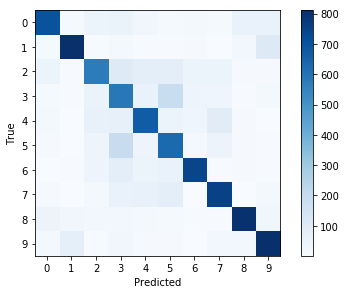

<Figure size 432x288 with 0 Axes>

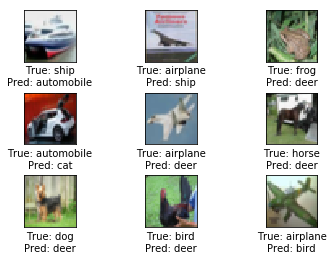

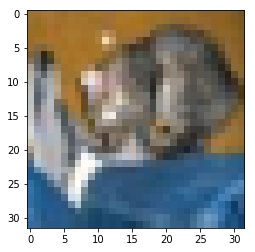

<Figure size 432x288 with 0 Axes>

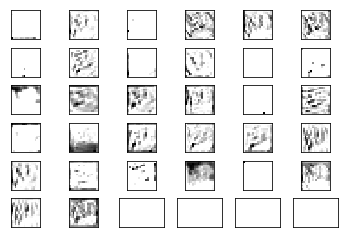

<Figure size 432x288 with 0 Axes>

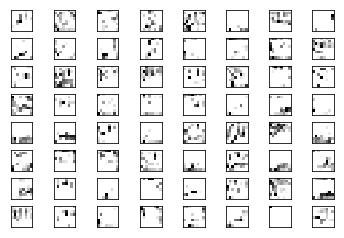

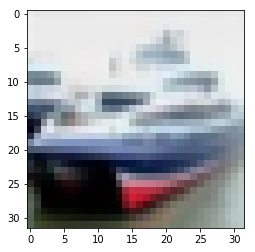

<Figure size 432x288 with 0 Axes>

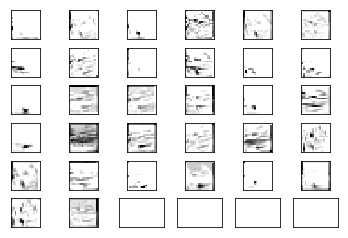

<Figure size 432x288 with 0 Axes>

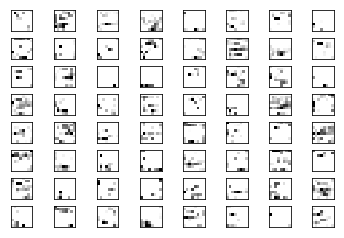

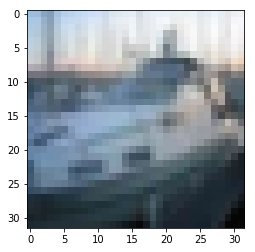

<Figure size 432x288 with 0 Axes>

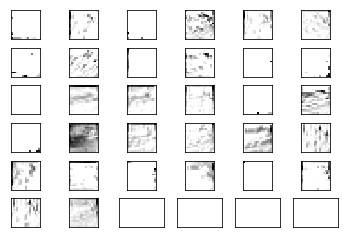

<Figure size 432x288 with 0 Axes>

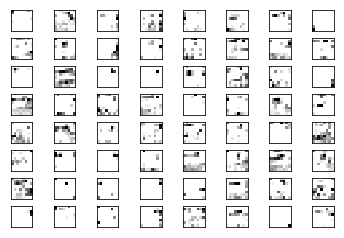

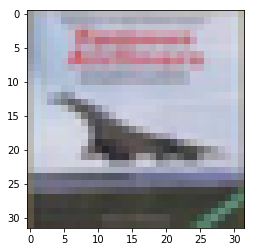

<Figure size 432x288 with 0 Axes>

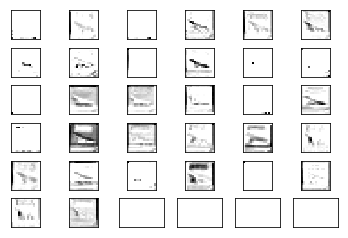

<Figure size 432x288 with 0 Axes>

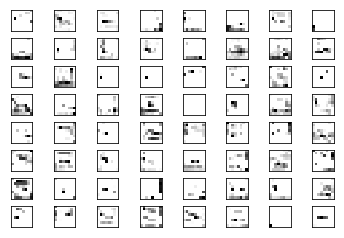

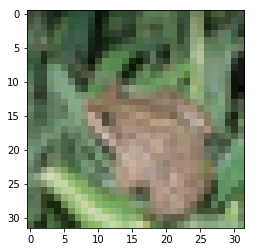

<Figure size 432x288 with 0 Axes>

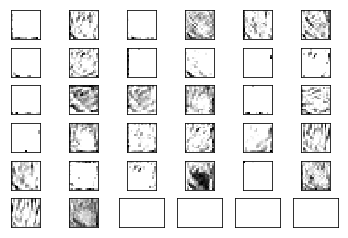

<Figure size 432x288 with 0 Axes>

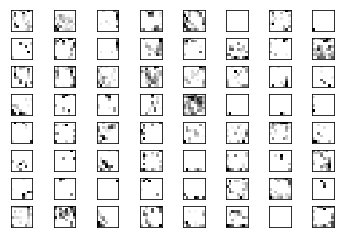

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix

import cache    # module from Hvass Labs
import dataset  # module from Hvass Labs
import download # module from Hvass Labs
import cifar10  # module from Hvass Labs

import utils

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size_train = 50000
data_size_test = 10000
batch_size = 100
lr = 1e-3
epoch = 15


""" Data Loading """
def load_cifar10():
    # make directory if not exist
    if not os.path.isdir("data"):
        os.mkdir("data")
    if not os.path.isdir("data/CIFAR-10"):
        os.mkdir("data/CIFAR-10")

    # download and extract if not done yet
    # data is downloaded 
    # from data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    # to data_path  = "data/CIFAR-10/"
    cifar10.data_path = "data/CIFAR-10/"
    cifar10.maybe_download_and_extract()

    # load data
    x_train, y_train_cls, y_train = cifar10.load_training_data()
    x_test, y_test_cls, y_test = cifar10.load_test_data()
    class_names = cifar10.load_class_names()

    x_train = x_train.astype(np.float32)
    y_train_cls = y_train_cls.astype(np.int32)
    y_train = y_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    y_test_cls = y_test_cls.astype(np.int32)
    y_test = y_test.astype(np.float32)

    data = (x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names)

    return data

# x_train.shape     :  (50000, 32, 32, 3)
# x_test.shape      :  (10000, 32, 32, 3)
# y_train.shape     :  (50000, 10)
# y_test.shape      :  (10000, 10)
# y_train_cls.shape :  (50000,)
# y_test_cls.shape  :  (10000,)
data = load_cifar10()
x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names = data


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='y')
y_cls = tf.placeholder(tf.int32, shape=(None,), name='y_cls')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')

# weights and layers #################################################################

# convolution layer 1
# input and input.shape:   x,     (None, 32, 32, 3)
# output and output.shape: conv1, (None, 16, 16, 32)
conv1_W = tf.get_variable("conv1_W", \
                          shape=(5,5,3,32), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv1 = tf.nn.conv2d(x, conv1_W, strides=(1,1,1,1), padding='SAME') # (None, 32, 32, 32)
conv1 = tf.nn.relu(conv1) # (None, 32, 32, 32)
conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 16, 16, 32)

# convolution layer 2
# input and input.shape:   conv1, (None, 16, 16, 32)
# output and output.shape: conv2, (None, 8, 8, 64)
conv2_W = tf.get_variable("conv2_W", \
                          shape=(5,5,32,64), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=(1,1,1,1), \
                     padding='SAME') # (None, 16, 16, 64)
conv2 = tf.nn.relu(conv2) # (None, 16, 16, 64)
conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 8, 8, 64)

# fully connected layer
# input and input.shape:   conv2, (None, 8, 8, 64)
# output and output.shape: fc,    (None, 256) 
flatten = tf.reshape(conv2, (-1, 4096)) # (None, 4096) 
fc_W = tf.get_variable("fc_W", \
                        shape=(4096,256), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
fc = tf.matmul(flatten, fc_W) # (None, 256) 
fc = tf.nn.relu(fc) # (None, 256)
fc = tf.nn.dropout(fc, keep_prob=keep_prob) # (None, 256)

# output layer
# input and input.shape:   fc,     (None, 256) 
# output and output.shape: logits, (None, 10) 
out_W = tf.get_variable("out_W", \
                        shape=(256, 10), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
logits = fc @ out_W # (None, 10) 

# weights and layers #################################################################

# y_pred, and y_pred_cls 
y_pred = tf.nn.softmax(logits, name='y_pred') # probabilities
y_pred_cls = tf.argmax(logits, axis=1, output_type=tf.int32)

# cross_entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y)
cost = tf.reduce_mean(cross_entropy)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# test accuracy
# you have to put test sets to compute test_accuracy
correct_bool = tf.equal(y_cls, y_pred_cls)
test_accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))


""" Train and Test """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    
    # run gradient descent
    for i in range(epoch):
        if 1:
            # perform random permutaion
            idx = np.random.permutation(np.arange(data_size_train)) 
            x_batch = x_train[idx]
            y_batch = y_train[idx]
        else:
            # don't perform random permutaion
            x_batch = x_train
            y_batch = y_train
            
        cost_this_epoch = 0
        for batch_number in range(int(data_size_train/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b, keep_prob: 0.8}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            cost_this_epoch += cost_now
            
        print('epoch_number    :', i)
        print('cost_this_epoch :', cost_this_epoch)
        print()

            
    # compute test accuracy and print confusion matrix 
    x_data = x_test
    y_data = y_test
    y_cls_data = y_test_cls
    y_test_cls_pred = np.zeros(shape=(data_size_test), dtype=np.int32)
    test_accuracy_list = []
    for batch_number in range(int(data_size_test/batch_size)): 
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_b = y_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_cls_b = y_cls_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        test_accuracy_temp, y_test_cls_pred_now = sess.run([test_accuracy,y_pred_cls],
                                                           feed_dict=feed_dict)
        test_accuracy_list.append(test_accuracy_temp)
        y_test_cls_pred[batch_number*batch_size:(batch_number+1)*batch_size] = \
            y_test_cls_pred_now
        
    print('Test Accuracy: ', np.mean(np.array(test_accuracy_list)))
    
    cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('img/cm.png')
    plt.close()
    
    
    # collect info of first 9 test images with false prediction
    images = []
    cls_true = []
    cls_pred = []
    img_shape = (32, 32, 3)
    num_false_prediction = 0
    i = 0
    while num_false_prediction < 9:
        x_b = [x_test[i]]
        y_b = [y_test[i]]
        y_cls_b = [y_test_cls[i]]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        bool_now, y_pred_cls_now = sess.run([correct_bool, y_pred_cls], \
                                            feed_dict=feed_dict)
        if bool_now[0] == False:
            images.append(x_b[0])
            cls_true.append(y_cls_b[0])
            cls_pred.append(y_pred_cls_now[0])
            num_false_prediction += 1
        i += 1
    images = images[0:9]
    cls_true = cls_true[0:9]
    cls_pred = cls_pred[0:9]

        
    # plot 9 test images with false prediction
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    
    plt.figure()
    fig, axes = plt.subplots(sqrt_n, sqrt_n)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i < n:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            if (cls_true is not None) and (cls_pred is not None):
                xlabel = "True: {0}\nPred: {1}".format(class_names[cls_true[i]], \
                                                       class_names[cls_pred[i]])
            elif (cls_true is not None) and (cls_pred is None):
                xlabel = "True: {0}".format(class_names[cls_true[i]])
            elif (cls_true is None) and (cls_pred is not None):
                xlabel = "Pred: {0}".format(class_names[cls_pred[i]])
            else:
                xlabel = ""
            ax.set_xlabel(xlabel)

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
    # plot_test_images_in_input_conv1_conv2_layers(self, num_test_images=2):
    num_test_images = 5
    for i in range(num_test_images):
        image0 = x_test[i]
        utils.plot_one_image(image0, (32, 32, 3), cls_true=None, cls_pred=None)

        feed_dict = {x: [image0]}
        image0_layer1, image0_layer2 = sess.run([conv1, conv2], feed_dict=feed_dict)
        
        # image0_layer1.shape = (1, 16, 16, 32)
        # image0_layer2.shape = (1, 8, 8, 64)
        image0_layer1 = image0_layer1[0]
        image0_layer2 = image0_layer2[0]

        utils.plot_many_images_3d(image0_layer1)
        utils.plot_many_images_3d(image0_layer2)

# filter_size = 6

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
epoch_number    : 0
cost_this_epoch : 806.6748163700104

epoch_number    : 1
cost_this_epoch : 596.7369203567505

epoch_number    : 2
cost_this_epoch : 504.99360632896423

epoch_number    : 3
cost_this_epoch : 439.22649723291397

epoch_number    : 4
cost_this_epoch : 378.9301097691059

epoch_number    : 5
cost_this_epoch : 328.1075924038887

epoch_number    : 6
cost_this_epoch : 275.84542831778526

epoch_number    : 7
cost_this_epoch : 230.43502815067768

epoch_number    : 8
cost_this_epoch : 192.72843317687511


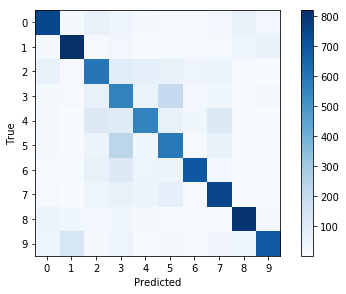

<Figure size 432x288 with 0 Axes>

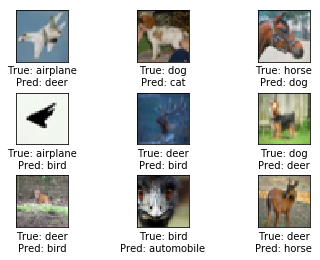

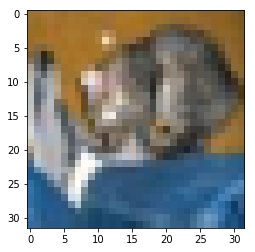

<Figure size 432x288 with 0 Axes>

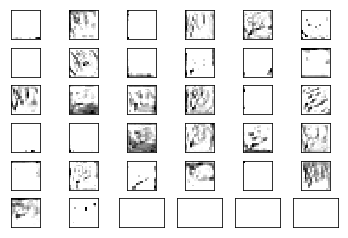

<Figure size 432x288 with 0 Axes>

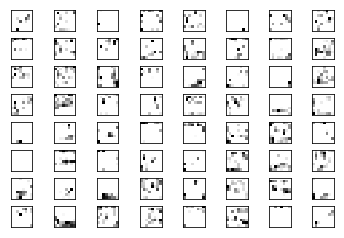

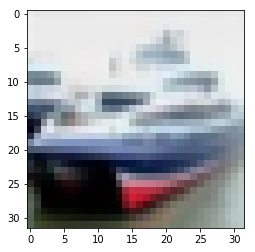

<Figure size 432x288 with 0 Axes>

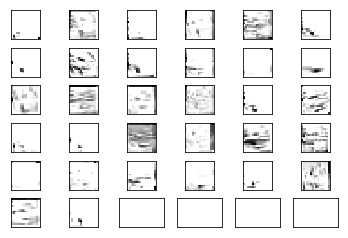

<Figure size 432x288 with 0 Axes>

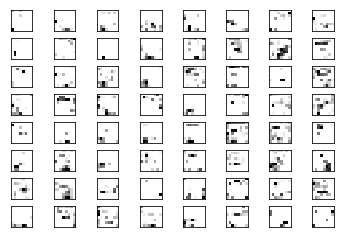

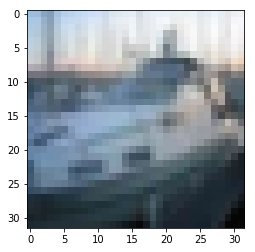

<Figure size 432x288 with 0 Axes>

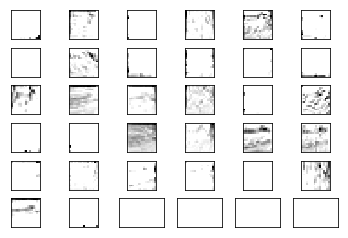

<Figure size 432x288 with 0 Axes>

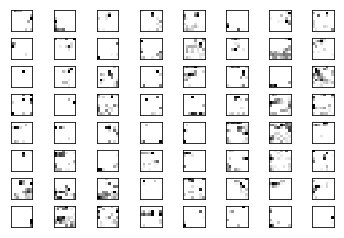

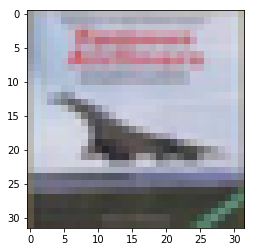

<Figure size 432x288 with 0 Axes>

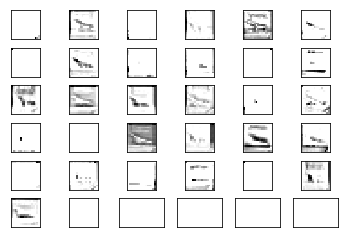

<Figure size 432x288 with 0 Axes>

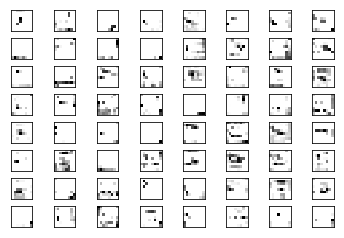

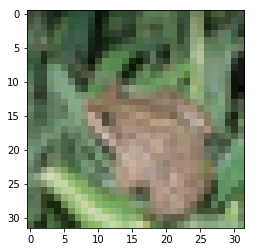

<Figure size 432x288 with 0 Axes>

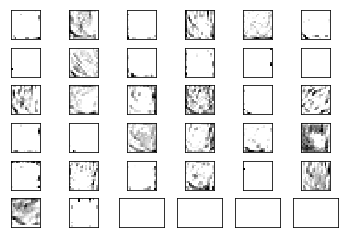

<Figure size 432x288 with 0 Axes>

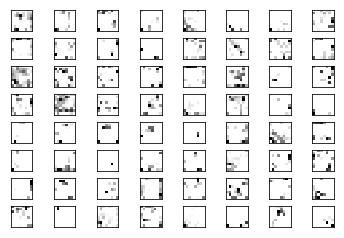

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix

import cache    # module from Hvass Labs
import dataset  # module from Hvass Labs
import download # module from Hvass Labs
import cifar10  # module from Hvass Labs

import utils

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size_train = 50000
data_size_test = 10000
batch_size = 100
lr = 1e-3
epoch = 15


""" Data Loading """
def load_cifar10():
    # make directory if not exist
    if not os.path.isdir("data"):
        os.mkdir("data")
    if not os.path.isdir("data/CIFAR-10"):
        os.mkdir("data/CIFAR-10")

    # download and extract if not done yet
    # data is downloaded 
    # from data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    # to data_path  = "data/CIFAR-10/"
    cifar10.data_path = "data/CIFAR-10/"
    cifar10.maybe_download_and_extract()

    # load data
    x_train, y_train_cls, y_train = cifar10.load_training_data()
    x_test, y_test_cls, y_test = cifar10.load_test_data()
    class_names = cifar10.load_class_names()

    x_train = x_train.astype(np.float32)
    y_train_cls = y_train_cls.astype(np.int32)
    y_train = y_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    y_test_cls = y_test_cls.astype(np.int32)
    y_test = y_test.astype(np.float32)

    data = (x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names)

    return data

# x_train.shape     :  (50000, 32, 32, 3)
# x_test.shape      :  (10000, 32, 32, 3)
# y_train.shape     :  (50000, 10)
# y_test.shape      :  (10000, 10)
# y_train_cls.shape :  (50000,)
# y_test_cls.shape  :  (10000,)
data = load_cifar10()
x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names = data


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='y')
y_cls = tf.placeholder(tf.int32, shape=(None,), name='y_cls')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')

# weights and layers #################################################################

# convolution layer 1
# input and input.shape:   x,     (None, 32, 32, 3)
# output and output.shape: conv1, (None, 16, 16, 32)
conv1_W = tf.get_variable("conv1_W", \
                          shape=(6,6,3,32), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv1 = tf.nn.conv2d(x, conv1_W, strides=(1,1,1,1), padding='SAME') # (None, 32, 32, 32)
conv1 = tf.nn.relu(conv1) # (None, 32, 32, 32)
conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 16, 16, 32)

# convolution layer 2
# input and input.shape:   conv1, (None, 16, 16, 32)
# output and output.shape: conv2, (None, 8, 8, 64)
conv2_W = tf.get_variable("conv2_W", \
                          shape=(6,6,32,64), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=(1,1,1,1), \
                     padding='SAME') # (None, 16, 16, 64)
conv2 = tf.nn.relu(conv2) # (None, 16, 16, 64)
conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 8, 8, 64)

# fully connected layer
# input and input.shape:   conv2, (None, 8, 8, 64)
# output and output.shape: fc,    (None, 256) 
flatten = tf.reshape(conv2, (-1, 4096)) # (None, 4096) 
fc_W = tf.get_variable("fc_W", \
                        shape=(4096,256), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
fc = tf.matmul(flatten, fc_W) # (None, 256) 
fc = tf.nn.relu(fc) # (None, 256)
fc = tf.nn.dropout(fc, keep_prob=keep_prob) # (None, 256)

# output layer
# input and input.shape:   fc,     (None, 256) 
# output and output.shape: logits, (None, 10) 
out_W = tf.get_variable("out_W", \
                        shape=(256, 10), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
logits = fc @ out_W # (None, 10) 

# weights and layers #################################################################

# y_pred, and y_pred_cls 
y_pred = tf.nn.softmax(logits, name='y_pred') # probabilities
y_pred_cls = tf.argmax(logits, axis=1, output_type=tf.int32)

# cross_entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y)
cost = tf.reduce_mean(cross_entropy)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# test accuracy
# you have to put test sets to compute test_accuracy
correct_bool = tf.equal(y_cls, y_pred_cls)
test_accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))


""" Train and Test """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    
    # run gradient descent
    for i in range(epoch):
        if 1:
            # perform random permutaion
            idx = np.random.permutation(np.arange(data_size_train)) 
            x_batch = x_train[idx]
            y_batch = y_train[idx]
        else:
            # don't perform random permutaion
            x_batch = x_train
            y_batch = y_train
            
        cost_this_epoch = 0
        for batch_number in range(int(data_size_train/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b, keep_prob: 0.8}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            cost_this_epoch += cost_now
            
        print('epoch_number    :', i)
        print('cost_this_epoch :', cost_this_epoch)
        print()

            
    # compute test accuracy and print confusion matrix 
    x_data = x_test
    y_data = y_test
    y_cls_data = y_test_cls
    y_test_cls_pred = np.zeros(shape=(data_size_test), dtype=np.int32)
    test_accuracy_list = []
    for batch_number in range(int(data_size_test/batch_size)): 
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_b = y_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_cls_b = y_cls_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        test_accuracy_temp, y_test_cls_pred_now = sess.run([test_accuracy,y_pred_cls],
                                                           feed_dict=feed_dict)
        test_accuracy_list.append(test_accuracy_temp)
        y_test_cls_pred[batch_number*batch_size:(batch_number+1)*batch_size] = \
            y_test_cls_pred_now
        
    print('Test Accuracy: ', np.mean(np.array(test_accuracy_list)))
    
    cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('img/cm.png')
    plt.close()
    
    
    # collect info of first 9 test images with false prediction
    images = []
    cls_true = []
    cls_pred = []
    img_shape = (32, 32, 3)
    num_false_prediction = 0
    i = 0
    while num_false_prediction < 9:
        x_b = [x_test[i]]
        y_b = [y_test[i]]
        y_cls_b = [y_test_cls[i]]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        bool_now, y_pred_cls_now = sess.run([correct_bool, y_pred_cls], \
                                            feed_dict=feed_dict)
        if bool_now[0] == False:
            images.append(x_b[0])
            cls_true.append(y_cls_b[0])
            cls_pred.append(y_pred_cls_now[0])
            num_false_prediction += 1
        i += 1
    images = images[0:9]
    cls_true = cls_true[0:9]
    cls_pred = cls_pred[0:9]

        
    # plot 9 test images with false prediction
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    
    plt.figure()
    fig, axes = plt.subplots(sqrt_n, sqrt_n)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i < n:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            if (cls_true is not None) and (cls_pred is not None):
                xlabel = "True: {0}\nPred: {1}".format(class_names[cls_true[i]], \
                                                       class_names[cls_pred[i]])
            elif (cls_true is not None) and (cls_pred is None):
                xlabel = "True: {0}".format(class_names[cls_true[i]])
            elif (cls_true is None) and (cls_pred is not None):
                xlabel = "Pred: {0}".format(class_names[cls_pred[i]])
            else:
                xlabel = ""
            ax.set_xlabel(xlabel)

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
    # plot_test_images_in_input_conv1_conv2_layers(self, num_test_images=2):
    num_test_images = 5
    for i in range(num_test_images):
        image0 = x_test[i]
        utils.plot_one_image(image0, (32, 32, 3), cls_true=None, cls_pred=None)

        feed_dict = {x: [image0]}
        image0_layer1, image0_layer2 = sess.run([conv1, conv2], feed_dict=feed_dict)
        
        # image0_layer1.shape = (1, 16, 16, 32)
        # image0_layer2.shape = (1, 8, 8, 64)
        image0_layer1 = image0_layer1[0]
        image0_layer2 = image0_layer2[0]

        utils.plot_many_images_3d(image0_layer1)
        utils.plot_many_images_3d(image0_layer2)

# filter_size = 7

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
epoch_number    : 0
cost_this_epoch : 852.5054167509079

epoch_number    : 1
cost_this_epoch : 622.5088586211205

epoch_number    : 2
cost_this_epoch : 528.8859661817551

epoch_number    : 3
cost_this_epoch : 463.39146345853806

epoch_number    : 4
cost_this_epoch : 404.8098258972168

epoch_number    : 5
cost_this_epoch : 349.45273980498314

epoch_number    : 6
cost_this_epoch : 300.982379257679

epoch_number    : 7
cost_this_epoch : 255.7587665617466

epoch_number    : 8
cost_this_epoch : 212.85644356906414

ep

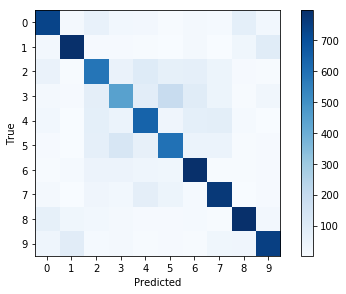

<Figure size 432x288 with 0 Axes>

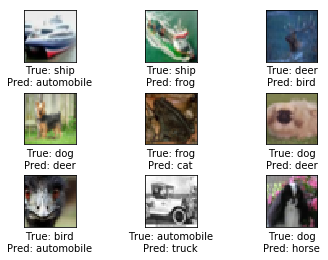

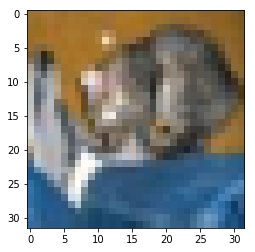

<Figure size 432x288 with 0 Axes>

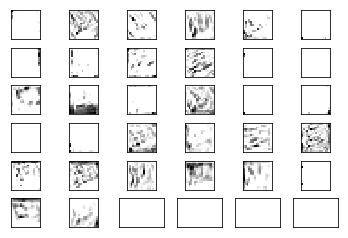

<Figure size 432x288 with 0 Axes>

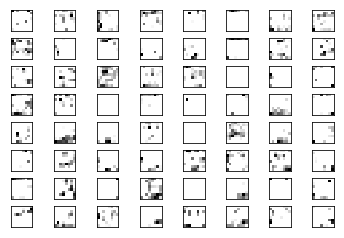

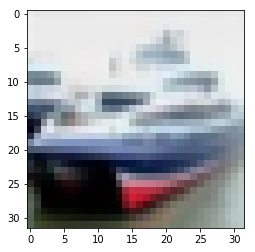

<Figure size 432x288 with 0 Axes>

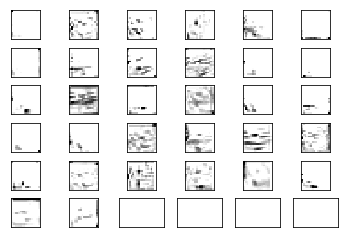

<Figure size 432x288 with 0 Axes>

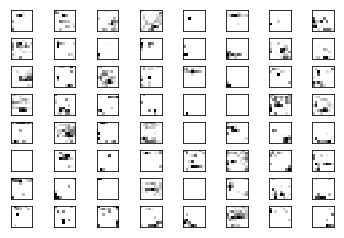

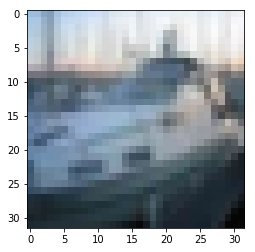

<Figure size 432x288 with 0 Axes>

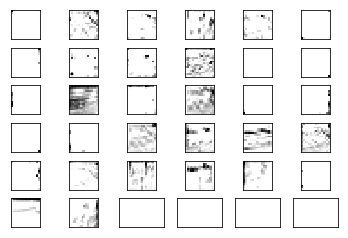

<Figure size 432x288 with 0 Axes>

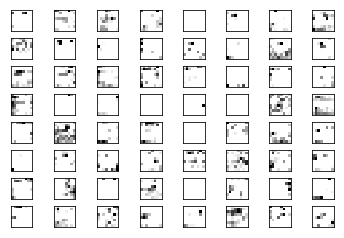

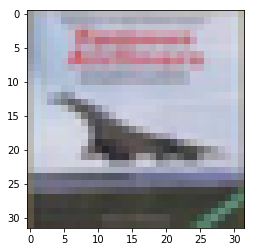

<Figure size 432x288 with 0 Axes>

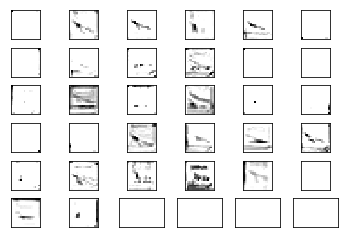

<Figure size 432x288 with 0 Axes>

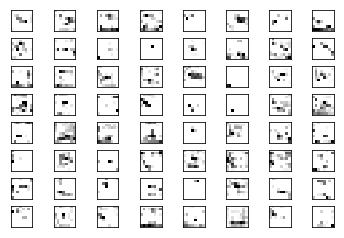

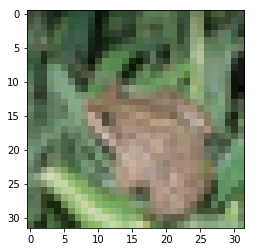

<Figure size 432x288 with 0 Axes>

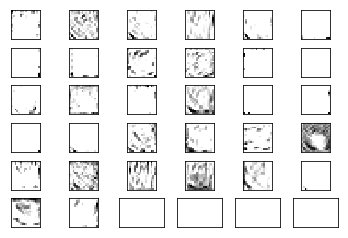

<Figure size 432x288 with 0 Axes>

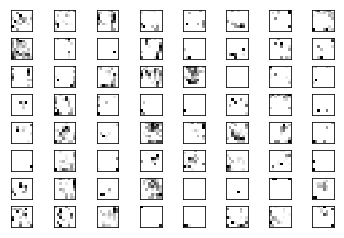

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix

import cache    # module from Hvass Labs
import dataset  # module from Hvass Labs
import download # module from Hvass Labs
import cifar10  # module from Hvass Labs

import utils

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size_train = 50000
data_size_test = 10000
batch_size = 100
lr = 1e-3
epoch = 15


""" Data Loading """
def load_cifar10():
    # make directory if not exist
    if not os.path.isdir("data"):
        os.mkdir("data")
    if not os.path.isdir("data/CIFAR-10"):
        os.mkdir("data/CIFAR-10")

    # download and extract if not done yet
    # data is downloaded 
    # from data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    # to data_path  = "data/CIFAR-10/"
    cifar10.data_path = "data/CIFAR-10/"
    cifar10.maybe_download_and_extract()

    # load data
    x_train, y_train_cls, y_train = cifar10.load_training_data()
    x_test, y_test_cls, y_test = cifar10.load_test_data()
    class_names = cifar10.load_class_names()

    x_train = x_train.astype(np.float32)
    y_train_cls = y_train_cls.astype(np.int32)
    y_train = y_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    y_test_cls = y_test_cls.astype(np.int32)
    y_test = y_test.astype(np.float32)

    data = (x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names)

    return data

# x_train.shape     :  (50000, 32, 32, 3)
# x_test.shape      :  (10000, 32, 32, 3)
# y_train.shape     :  (50000, 10)
# y_test.shape      :  (10000, 10)
# y_train_cls.shape :  (50000,)
# y_test_cls.shape  :  (10000,)
data = load_cifar10()
x_train, y_train_cls, y_train, x_test, y_test_cls, y_test, class_names = data


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='y')
y_cls = tf.placeholder(tf.int32, shape=(None,), name='y_cls')
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')

# weights and layers #################################################################

# convolution layer 1
# input and input.shape:   x,     (None, 32, 32, 3)
# output and output.shape: conv1, (None, 16, 16, 32)
conv1_W = tf.get_variable("conv1_W", \
                          shape=(7,7,3,32), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv1 = tf.nn.conv2d(x, conv1_W, strides=(1,1,1,1), padding='SAME') # (None, 32, 32, 32)
conv1 = tf.nn.relu(conv1) # (None, 32, 32, 32)
conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 16, 16, 32)

# convolution layer 2
# input and input.shape:   conv1, (None, 16, 16, 32)
# output and output.shape: conv2, (None, 8, 8, 64)
conv2_W = tf.get_variable("conv2_W", \
                          shape=(7,7,32,64), \
                          initializer=tf.truncated_normal_initializer(stddev=0.1))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=(1,1,1,1), \
                     padding='SAME') # (None, 16, 16, 64)
conv2 = tf.nn.relu(conv2) # (None, 16, 16, 64)
conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), \
                       padding='SAME') # (None, 8, 8, 64)

# fully connected layer
# input and input.shape:   conv2, (None, 8, 8, 64)
# output and output.shape: fc,    (None, 256) 
flatten = tf.reshape(conv2, (-1, 4096)) # (None, 4096) 
fc_W = tf.get_variable("fc_W", \
                        shape=(4096,256), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
fc = tf.matmul(flatten, fc_W) # (None, 256) 
fc = tf.nn.relu(fc) # (None, 256)
fc = tf.nn.dropout(fc, keep_prob=keep_prob) # (None, 256)

# output layer
# input and input.shape:   fc,     (None, 256) 
# output and output.shape: logits, (None, 10) 
out_W = tf.get_variable("out_W", \
                        shape=(256, 10), \
                        initializer=tf.truncated_normal_initializer(stddev=0.1))
logits = fc @ out_W # (None, 10) 

# weights and layers #################################################################

# y_pred, and y_pred_cls 
y_pred = tf.nn.softmax(logits, name='y_pred') # probabilities
y_pred_cls = tf.argmax(logits, axis=1, output_type=tf.int32)

# cross_entropy cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y)
cost = tf.reduce_mean(cross_entropy)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# test accuracy
# you have to put test sets to compute test_accuracy
correct_bool = tf.equal(y_cls, y_pred_cls)
test_accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))


""" Train and Test """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    
    # run gradient descent
    for i in range(epoch):
        if 1:
            # perform random permutaion
            idx = np.random.permutation(np.arange(data_size_train)) 
            x_batch = x_train[idx]
            y_batch = y_train[idx]
        else:
            # don't perform random permutaion
            x_batch = x_train
            y_batch = y_train
            
        cost_this_epoch = 0
        for batch_number in range(int(data_size_train/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b, keep_prob: 0.8}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            cost_this_epoch += cost_now
            
        print('epoch_number    :', i)
        print('cost_this_epoch :', cost_this_epoch)
        print()

            
    # compute test accuracy and print confusion matrix 
    x_data = x_test
    y_data = y_test
    y_cls_data = y_test_cls
    y_test_cls_pred = np.zeros(shape=(data_size_test), dtype=np.int32)
    test_accuracy_list = []
    for batch_number in range(int(data_size_test/batch_size)): 
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_b = y_data[batch_number*batch_size:(batch_number+1)*batch_size]
        y_cls_b = y_cls_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        test_accuracy_temp, y_test_cls_pred_now = sess.run([test_accuracy,y_pred_cls],
                                                           feed_dict=feed_dict)
        test_accuracy_list.append(test_accuracy_temp)
        y_test_cls_pred[batch_number*batch_size:(batch_number+1)*batch_size] = \
            y_test_cls_pred_now
        
    print('Test Accuracy: ', np.mean(np.array(test_accuracy_list)))
    
    cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('img/cm.png')
    plt.close()
    
    
    # collect info of first 9 test images with false prediction
    images = []
    cls_true = []
    cls_pred = []
    img_shape = (32, 32, 3)
    num_false_prediction = 0
    i = 0
    while num_false_prediction < 9:
        x_b = [x_test[i]]
        y_b = [y_test[i]]
        y_cls_b = [y_test_cls[i]]
        feed_dict = {x: x_b, y: y_b, y_cls: y_cls_b, keep_prob: 1.0}
        bool_now, y_pred_cls_now = sess.run([correct_bool, y_pred_cls], \
                                            feed_dict=feed_dict)
        if bool_now[0] == False:
            images.append(x_b[0])
            cls_true.append(y_cls_b[0])
            cls_pred.append(y_pred_cls_now[0])
            num_false_prediction += 1
        i += 1
    images = images[0:9]
    cls_true = cls_true[0:9]
    cls_pred = cls_pred[0:9]

        
    # plot 9 test images with false prediction
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    
    plt.figure()
    fig, axes = plt.subplots(sqrt_n, sqrt_n)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i < n:
            ax.imshow(images[i].reshape(img_shape), cmap='binary')

            if (cls_true is not None) and (cls_pred is not None):
                xlabel = "True: {0}\nPred: {1}".format(class_names[cls_true[i]], \
                                                       class_names[cls_pred[i]])
            elif (cls_true is not None) and (cls_pred is None):
                xlabel = "True: {0}".format(class_names[cls_true[i]])
            elif (cls_true is None) and (cls_pred is not None):
                xlabel = "Pred: {0}".format(class_names[cls_pred[i]])
            else:
                xlabel = ""
            ax.set_xlabel(xlabel)

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
    # plot_test_images_in_input_conv1_conv2_layers(self, num_test_images=2):
    num_test_images = 5
    for i in range(num_test_images):
        image0 = x_test[i]
        utils.plot_one_image(image0, (32, 32, 3), cls_true=None, cls_pred=None)

        feed_dict = {x: [image0]}
        image0_layer1, image0_layer2 = sess.run([conv1, conv2], feed_dict=feed_dict)
        
        # image0_layer1.shape = (1, 16, 16, 32)
        # image0_layer2.shape = (1, 8, 8, 64)
        image0_layer1 = image0_layer1[0]
        image0_layer2 = image0_layer2[0]

        utils.plot_many_images_3d(image0_layer1)
        utils.plot_many_images_3d(image0_layer2)